**About This File**


###**About Dataset**  
About Dataset
There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

##**Data Set Information**
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

**Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

**Introduction**

This Dataset is a big challenge for a Data Scientist. Besides being unbalanced data, further, we will realize that some datasets don't have a solution. And so, take more information and data become crucial to solve the Data Science problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read the dataset**

In [ ]:
new_train = pd.read_csv('/content/drive/MyDrive/ML_project/ML_classification/Kaggle/Bank_Classification/new_train.csv')  

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=new_train.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
# Display last 5 rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
data.shape

(32950, 16)

**Insights There are 45211 records and 17 columns in the dataset.**

### **Check the data types of the columns**

In [ ]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


**Insights:  
There are NO missing values.   
object:job, marital, education,default, housing, loan, contact, month, pitcome, y  
int64:age, balance, day, duration, campaign, pdays, previous**  

### **Check for missing values**

In [ ]:
# Analyse missing values 
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

**We can convert the object type columns to categories**

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

In [ ]:
cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# Changing the data type of object type column to category. 

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


**Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


**Insights  


In [ ]:
# Check summary for categorical data.

data.describe(include='category').T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


**Insights

Let's look at the unique values in all the categorical variables

In [ ]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in job are :
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
****************************************
Unique values in marital are :
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
****************************************
Unique values in education are :
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64
****************************************
Unique values in default are :
no         26007
unknown     6940
yes            3
Name: default, dtype: int64
**********************************

*Insights: 

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in job are :
admin.           0.252322
blue-collar      0.225827
technician       0.163885
services         0.096995
management       0.071168
retired          0.041457
entrepreneur     0.035205
self-employed    0.033354
housemaid        0.025948
unemployed       0.024219
student          0.021578
unknown          0.008042
Name: job, dtype: float64
****************************************
Unique values in marital are :
married     0.605554
single      0.280941
divorced    0.111533
unknown     0.001973
Name: marital, dtype: float64
****************************************
Unique values in education are :
university.degree      0.295478
high.school            0.230531
basic.9y               0.146464
professional.course    0.127223
basic.4y               0.100819
basic.6y               0.056601
unknown                0.042398
illiterate             0.000486
Name: education, dtype: float64
****************************************
Unique values in default are :
no         0.78

##**Exploratory Data Analysis (EDA) and Visualization**

#**Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for age

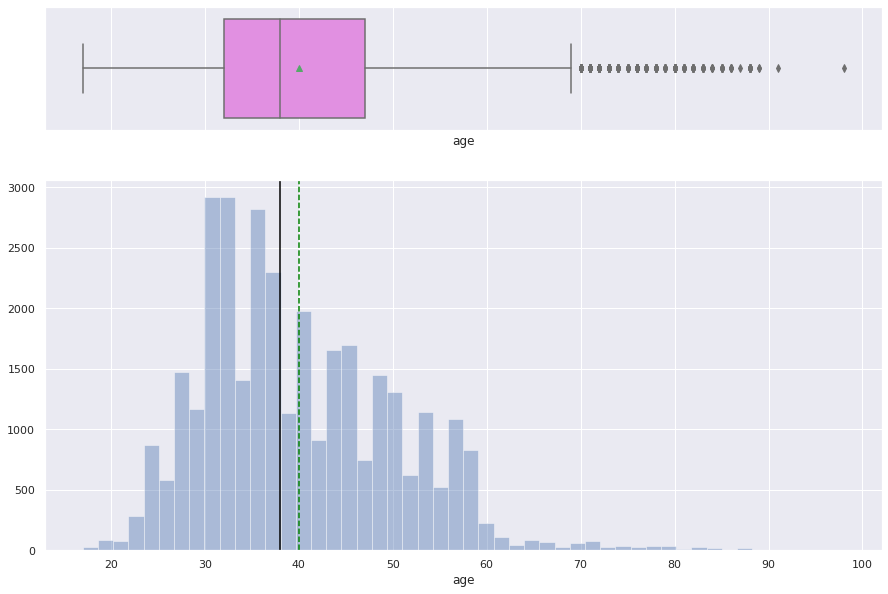

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['age'])

**Insights:**  

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

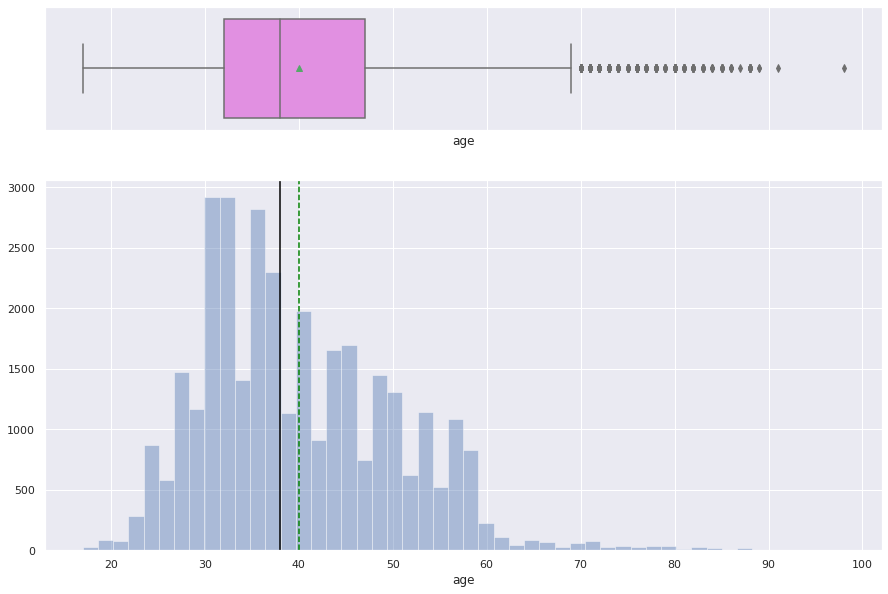

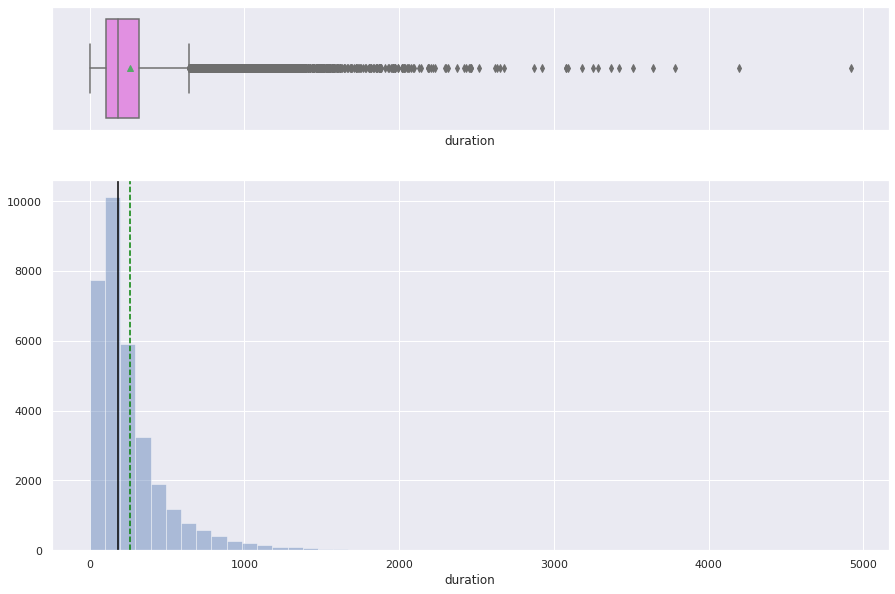

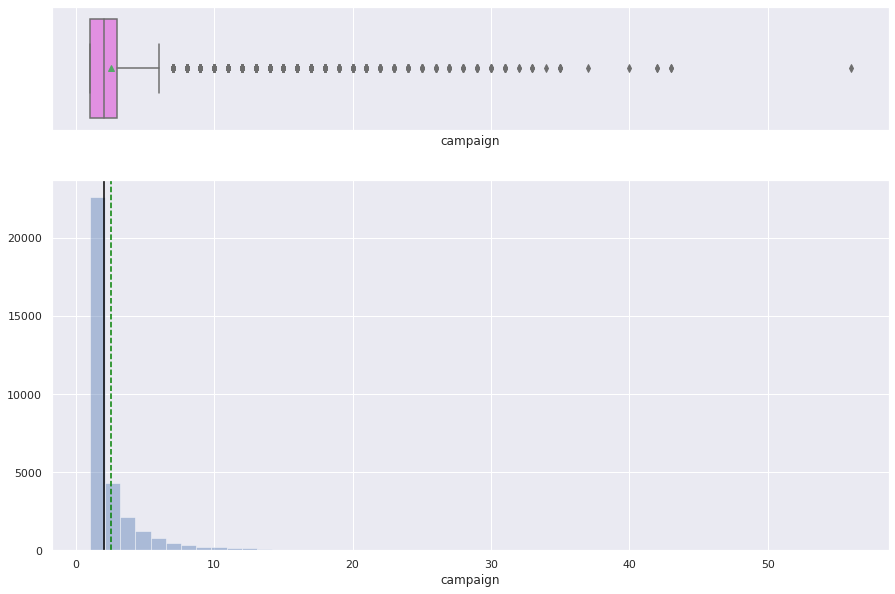

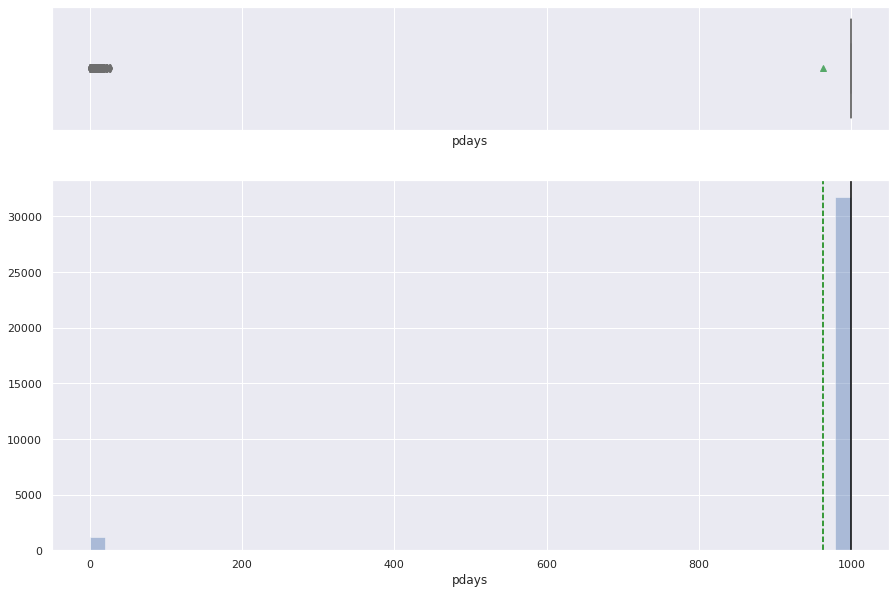

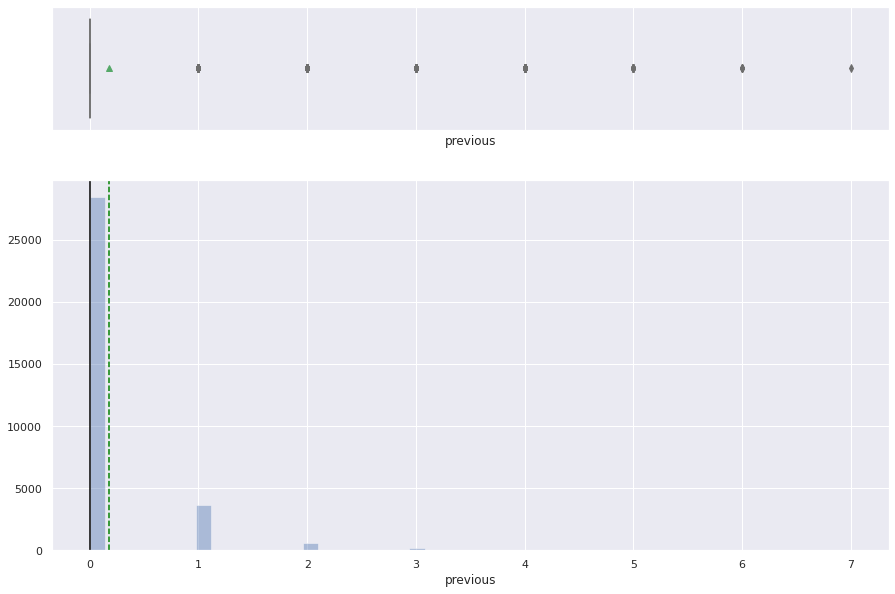

In [ ]:
cols_num= data.select_dtypes(['number']).columns

for i in cols_num: 
  histogram_boxplot(data[i])

**Insights** 

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for job

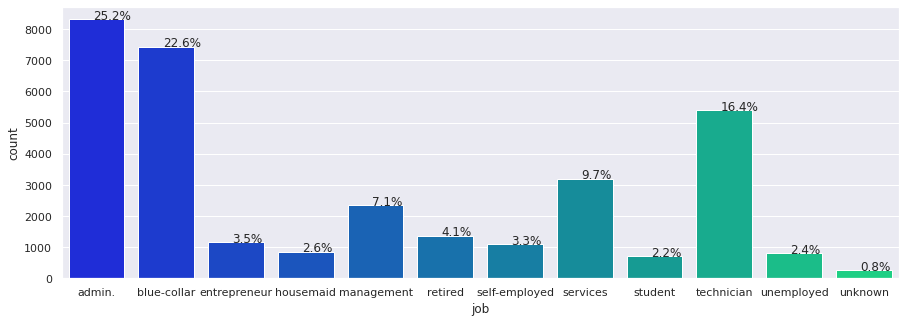

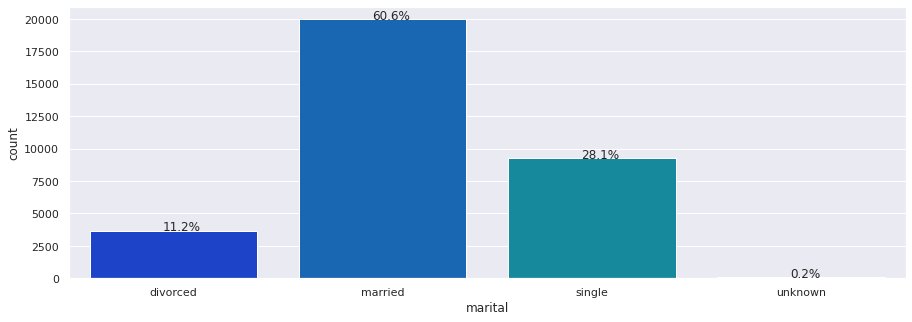

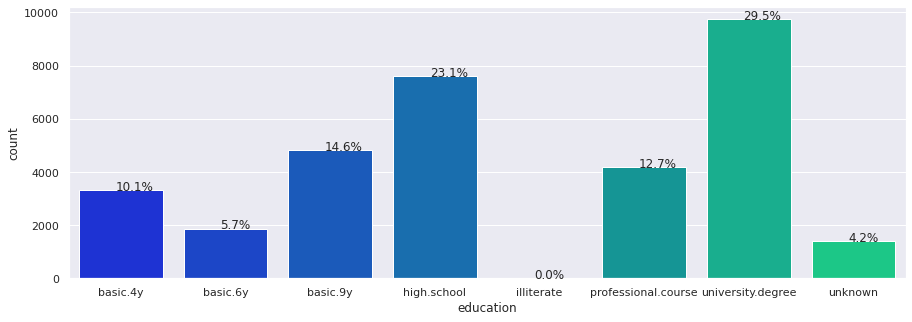

In [ ]:
#Build barplot for job
plt.figure(figsize=(15,5))
ax = sns.countplot(data["job"],palette='winter')
perc_on_bar(ax,data["job"])


#Build barplot for marital
plt.figure(figsize=(15,5))
ax = sns.countplot(data["marital"],palette='winter')
perc_on_bar(ax,data["marital"])

#Build barplot for education
plt.figure(figsize=(15,5))
ax = sns.countplot(data["education"],palette='winter')
perc_on_bar(ax,data["education"])

**Insights**  

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

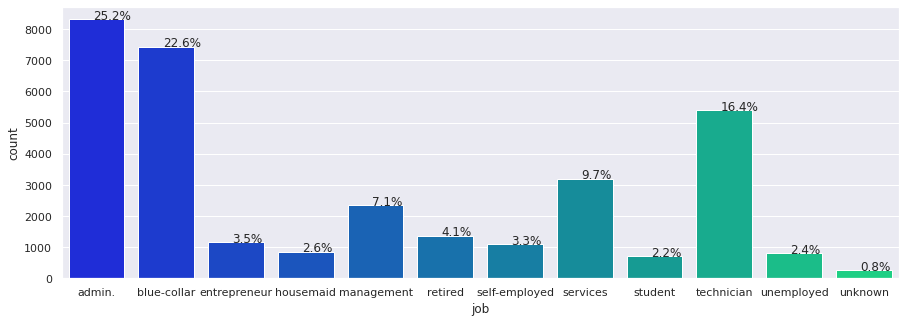

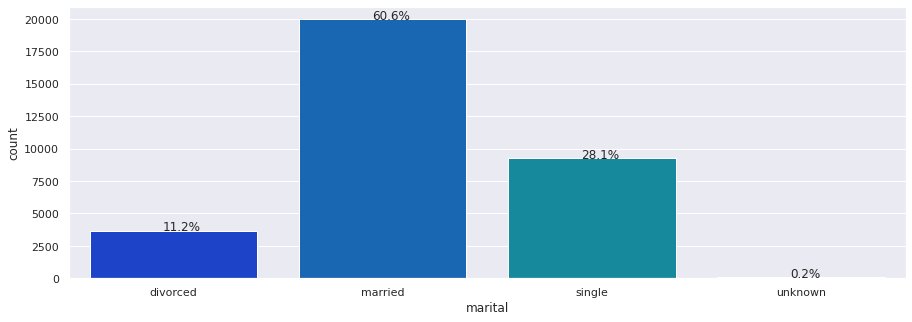

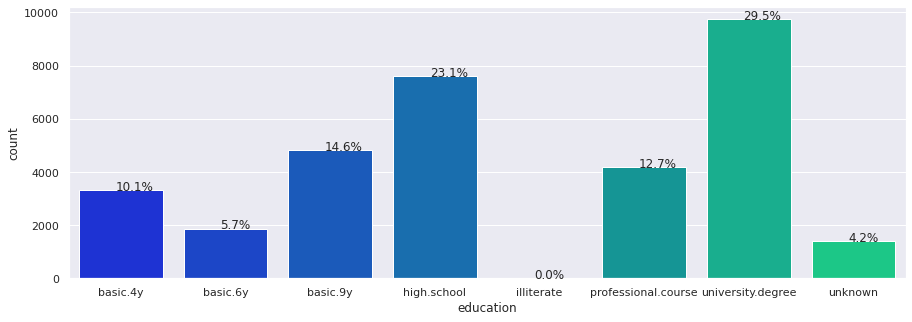

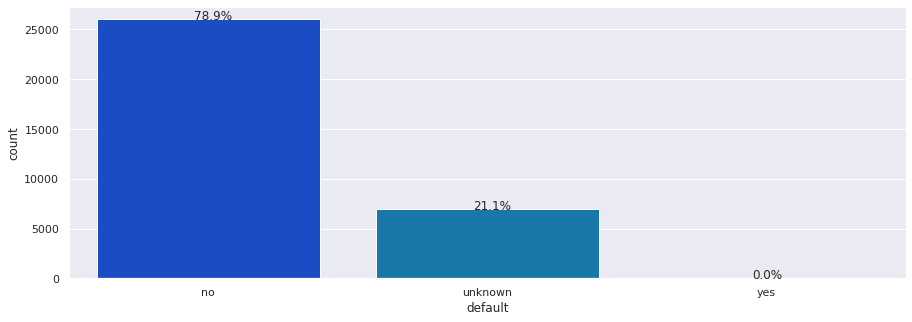

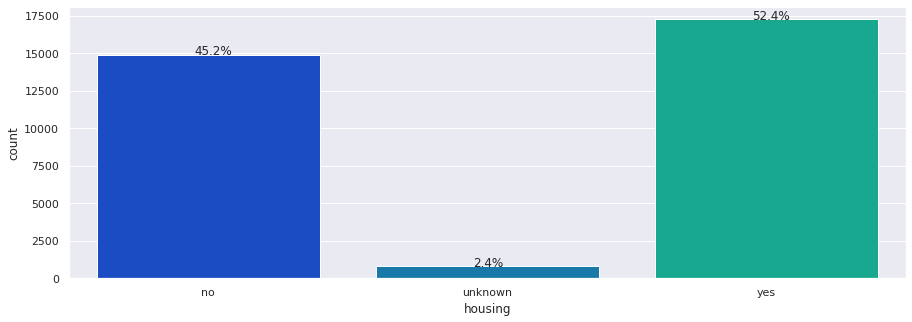

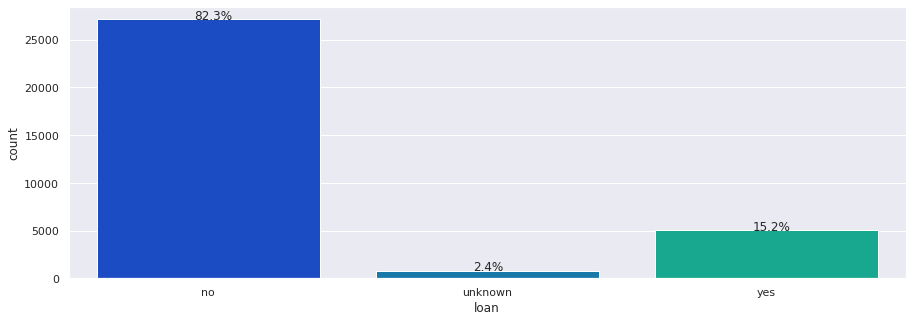

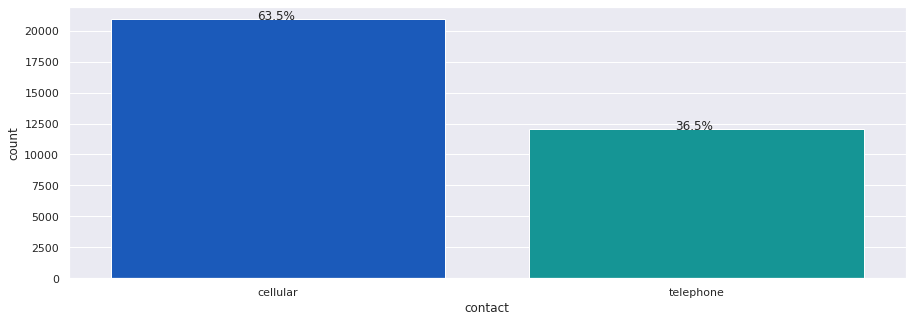

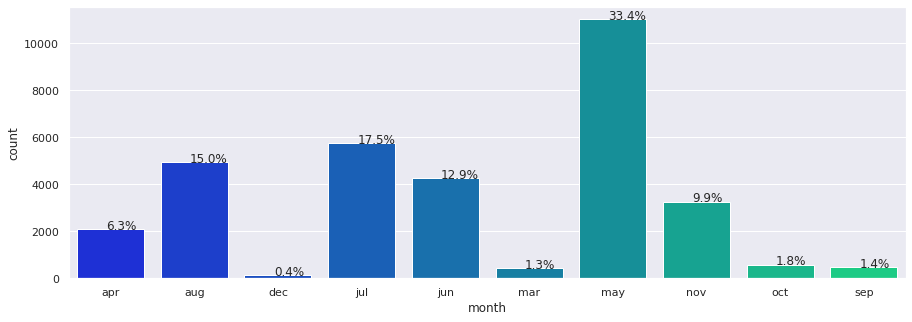

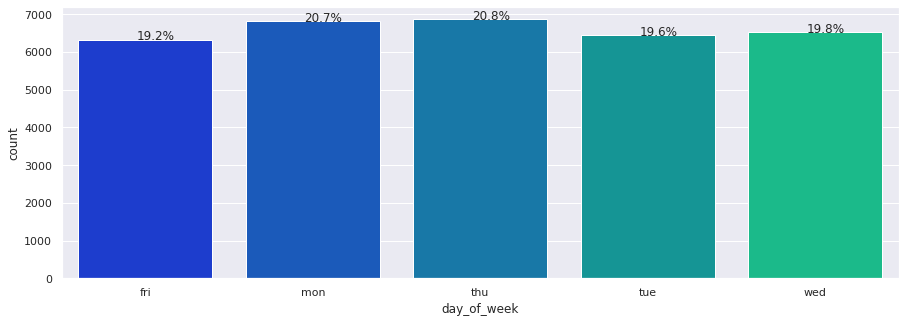

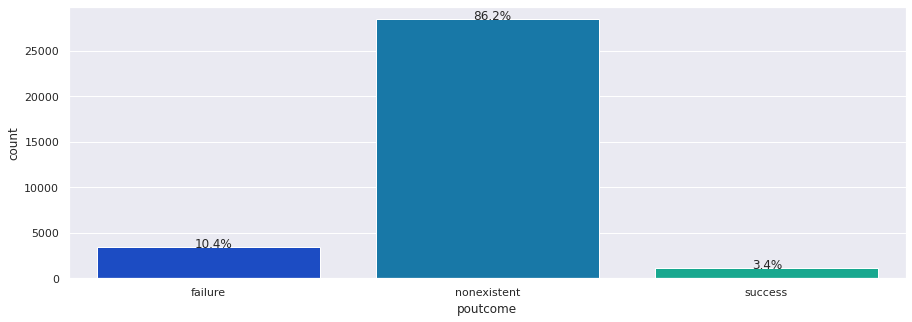

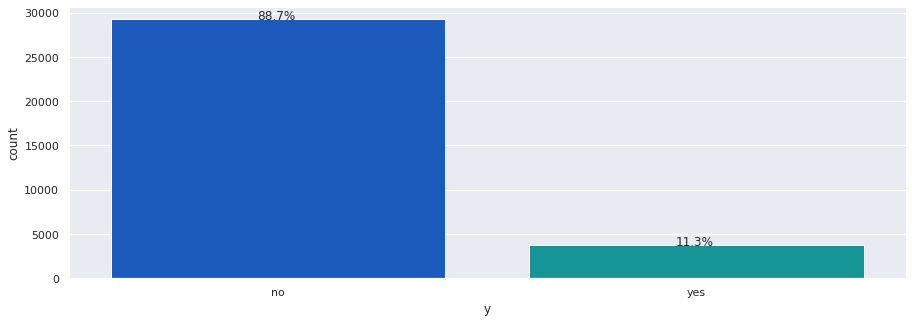

In [ ]:
for i in cols_cat: 
  plt.figure(figsize=(15,5))
  ax = sns.countplot(data[i],palette='winter')
  perc_on_bar(ax,data[i])

**Insights**   

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze y vs age

<AxesSubplot:xlabel='y', ylabel='age'>

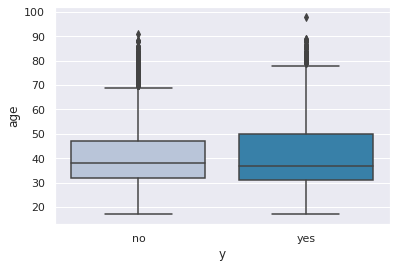

In [ ]:
sns.boxplot(data["y"],data['age'],palette="PuBu")

**Insights**  

<AxesSubplot:xlabel='y', ylabel='duration'>

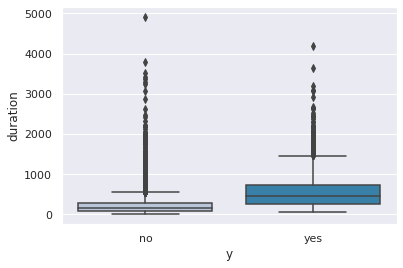

In [ ]:
sns.boxplot(data["y"],data['duration'],palette="PuBu")

<AxesSubplot:xlabel='y', ylabel='campaign'>

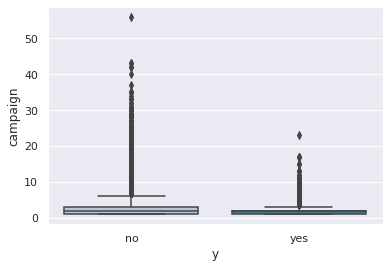

In [ ]:
sns.boxplot(data["y"],data['campaign'],palette="PuBu")

<AxesSubplot:xlabel='y', ylabel='pdays'>

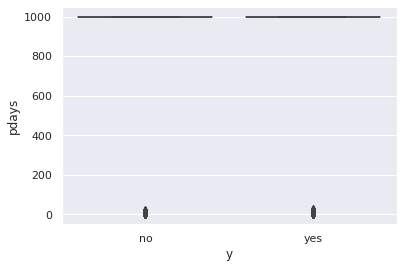

In [ ]:
sns.boxplot(data["y"],data['pdays'],palette="PuBu")

<AxesSubplot:xlabel='y', ylabel='previous'>

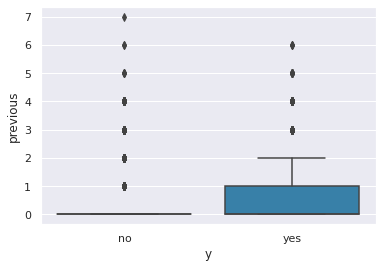

In [ ]:
sns.boxplot(data["y"],data['previous'],palette="PuBu")

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<AxesSubplot:xlabel='job', ylabel='age'>

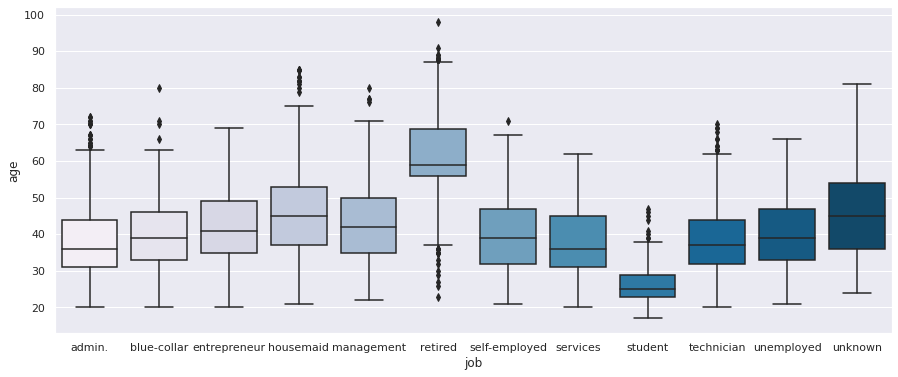

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data["job"], data["age"], data=data, palette="PuBu", ax=ax)

<AxesSubplot:xlabel='loan', ylabel='duration'>

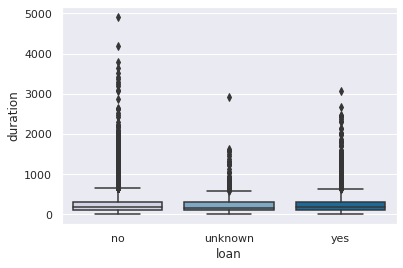

In [ ]:
sns.boxplot(data["loan"],data['duration'],palette="PuBu")

<AxesSubplot:xlabel='housing', ylabel='campaign'>

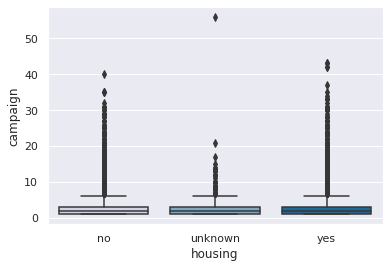

In [ ]:
sns.boxplot(data["housing"],data['campaign'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='duration', ylabel='pdays'>

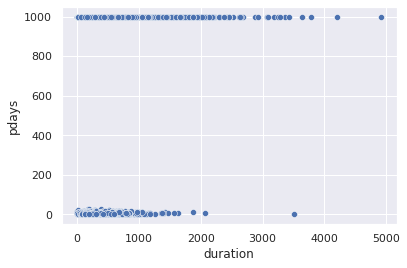

In [ ]:
sns.scatterplot(data["duration"],data['pdays'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='pdays', ylabel='campaign'>

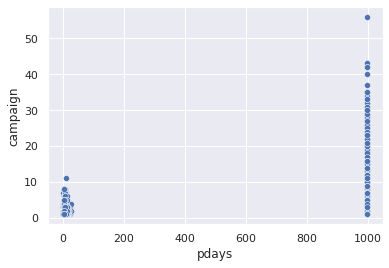

In [ ]:
sns.scatterplot(data["pdays"],data['campaign'],palette="PuBu")

<AxesSubplot:xlabel='balance', ylabel='duration'>

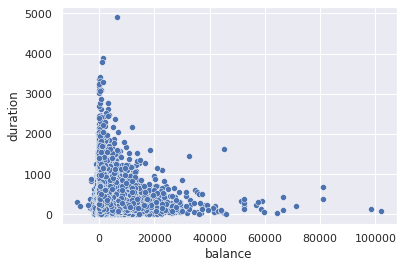

In [ ]:
sns.scatterplot(data["balance"],data['duration'],palette="PuBu")

<AxesSubplot:xlabel='previous', ylabel='pdays'>

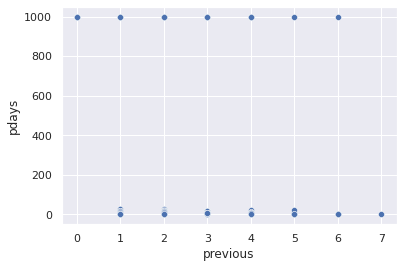

In [ ]:
sns.scatterplot(data["previous"],data['pdays'],palette="PuBu")

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['y'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['y'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for job and loan

y                 no   yes    All
job                              
admin.          7244  1070   8314
blue-collar     6926   515   7441
entrepreneur    1060   100   1160
housemaid        769    86    855
management      2076   269   2345
retired         1018   348   1366
self-employed    980   119   1099
services        2942   254   3196
student          494   217    711
technician      4815   585   5400
unemployed       682   116    798
unknown          232    33    265
All            29238  3712  32950
------------------------------------------------------------------------------------------------------------------------


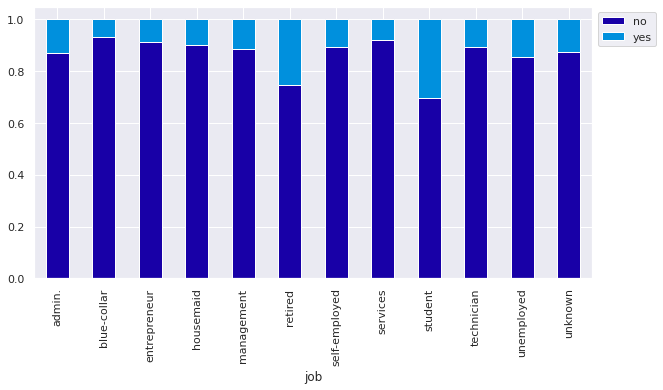

In [ ]:
# Plot stacked bar plot for y and job
stacked_plot(data['job'])

y           no   yes    All
loan                       
no       24073  3058  27131
unknown    706    90    796
yes       4459   564   5023
All      29238  3712  32950
------------------------------------------------------------------------------------------------------------------------


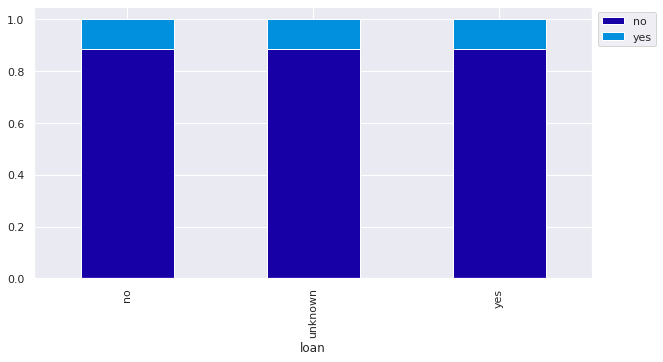

In [ ]:
# Plot stacked bar plot for y and loan
stacked_plot(data['loan'])

y           no   yes    All
housing                    
no       13272  1628  14900
unknown    706    90    796
yes      15260  1994  17254
All      29238  3712  32950
------------------------------------------------------------------------------------------------------------------------


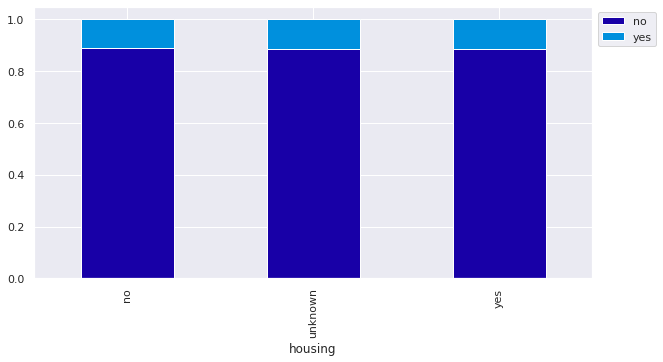

In [ ]:
# Plot stacked bar plot for y and housing
stacked_plot(data['housing'])

y            no   yes    All
marital                     
divorced   3304   371   3675
married   17933  2020  19953
single     7947  1310   9257
unknown      54    11     65
All       29238  3712  32950
------------------------------------------------------------------------------------------------------------------------


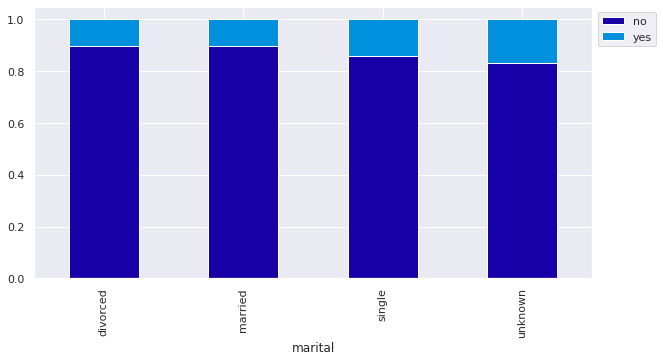

In [ ]:
# Plot stacked bar plot for y and marital
stacked_plot(data['marital'])

**Insight

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

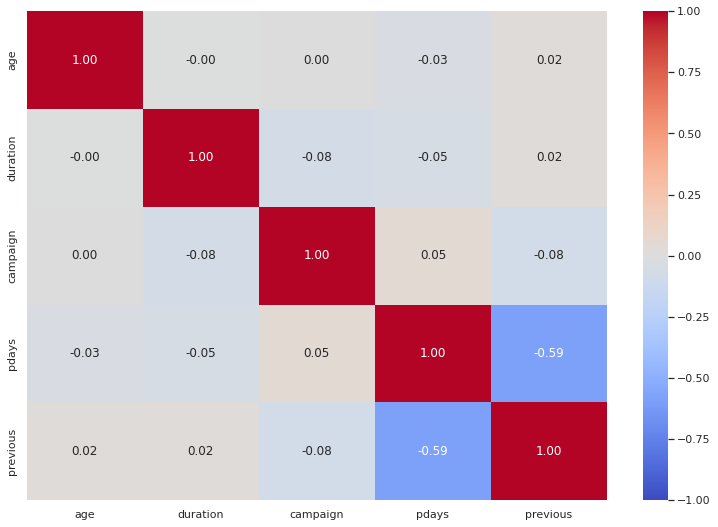

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(13,9))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True);

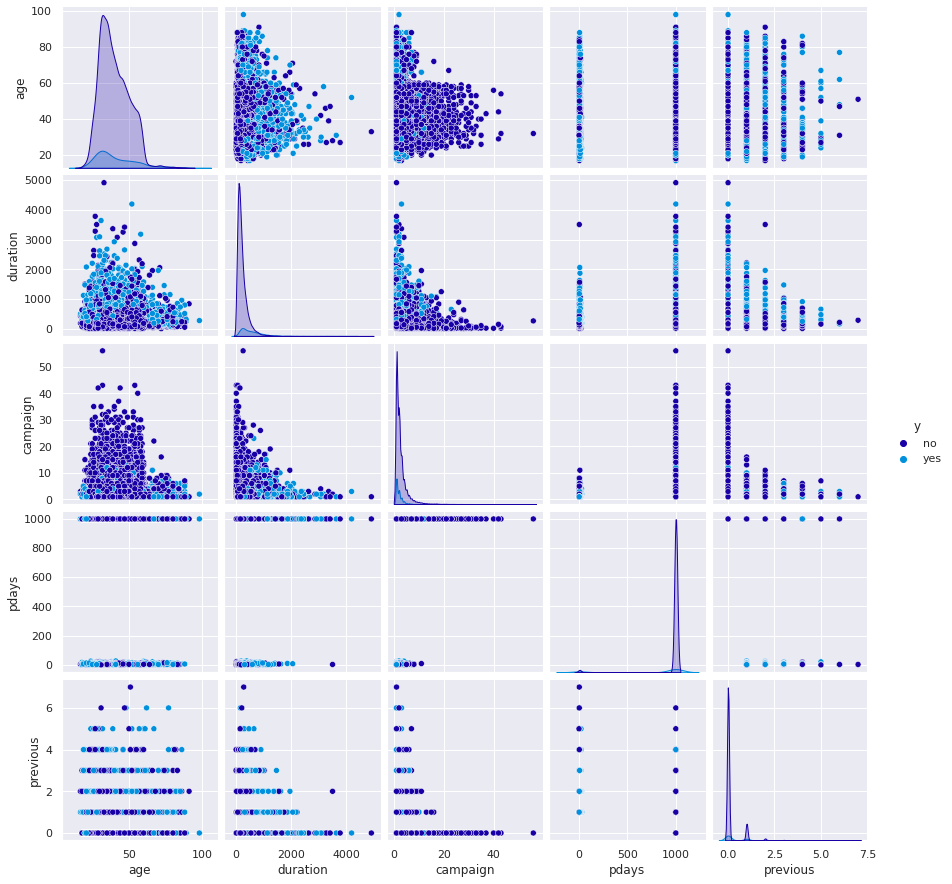

In [ ]:
# Build pairplot for the data with hue = 'y'

sns.pairplot(data, hue = "y")

#### Treating Outliers

In [ ]:

def treat_outliers(df,data):
    '''
    treats outliers in a varaible
    data: str, name of the numerical varaible
    df: data frame
    data: name of the column
    '''
    
    Q1= df[data].quantile(0.25) # 25th quantile
    Q3= df[data].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[data] = np.clip(df[data], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

numerical_col = list(filter(lambda x: x not in ['pdays', 'previous'], numerical_col)) #excluding pdays and previous in the outlier treatment, as the treatment removed everything other than 0 in the dataset.

df = treat_outliers_all(df_raw,numerical_col)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,39.935478,10.134734,17.0,32.0,38.0,47.0,69.5
duration,32950.0,234.923915,176.854558,0.0,103.0,180.0,319.0,643.0
campaign,32950.0,2.271077,1.546302,1.0,1.0,2.0,3.0,6.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


Make sure again no missing value.

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# y value as binary
df['y'] = np.where(df['y'] == "yes", 1, 0)

# Create y(dependent varibale)
y = df['y']

# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(['y'], axis=1, inplace = True)

# Create dummy variables for the categorical variables
X = pd.get_dummies(df,columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  float64
 1   duration                       32950 non-null  float64
 2   campaign                       32950 non-null  float64
 3   pdays                          32950 non-null  int64  
 4   previous                       32950 non-null  int64  
 5   job_blue-collar                32950 non-null  uint8  
 6   job_entrepreneur               32950 non-null  uint8  
 7   job_housemaid                  32950 non-null  uint8  
 8   job_management                 32950 non-null  uint8  
 9   job_retired                    32950 non-null  uint8  
 10  job_self-employed              32950 non-null  uint8  
 11  job_services                   32950 non-null  uint8  
 12  job_student                    32950 non-null 

### **Splitting the data into 70% train and 30% test set**

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

In [ ]:
print('X_train:', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train: (23065, 48)
X_test (9885, 48)
y_train (23065,)
y_test (9885,)


##Balancing the Traing Set

The Training Set is unbalanced. We need to necessary to organize it.

In [ ]:
y_train.value_counts()

0    20467
1     2598
Name: y, dtype: int64

In [ ]:
# Plot to check inbalance
#sns.countplot(y_train['y'], data = y_train)
#plt.show()

In [ ]:
import random

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [ ]:
y_train.value_counts()

1    2598
0    2598
Name: y, dtype: int64

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [ ]:
#scale the feature data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)  #to prevent data leakage, we will only transform but not fit the test data.

In [ ]:
# Defining the Logistic regression model

lr = LogisticRegression(class_weight= {0: .11, 1: .89},random_state =1)

# Fitting the model on the training data 

lr.fit(X_train_std, y_train)

LogisticRegression(class_weight={0: 0.11, 1: 0.89}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.57      0.72      2598
           1       0.69      0.98      0.81      2598

    accuracy                           0.78      5196
   macro avg       0.83      0.78      0.77      5196
weighted avg       0.83      0.78      0.77      5196



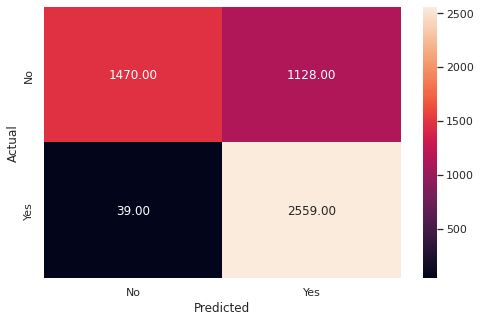

In [ ]:
#Predict for train set
y_train_pred = lr.predict(X_train_std)
#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       1.00      0.55      0.71      8771
           1       0.22      0.98      0.36      1114

    accuracy                           0.60      9885
   macro avg       0.61      0.77      0.53      9885
weighted avg       0.91      0.60      0.67      9885



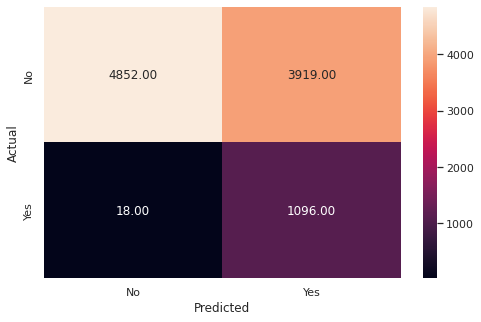

In [ ]:
#Predict for test set
y_test_pred = lr.predict(X_test_std)
#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

**Observations:**  

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [ ]:
# Printing the coefficients of logistic regression
coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef'])

coef.sort_values(by = 'coef', ascending = False)

,features,coef
1,duration,2.125248
40,month_oct,0.369772
41,month_sep,0.309519
37,month_mar,0.273378
9,job_retired,0.260000
12,job_student,0.250516
17,marital_single,0.242063
34,month_dec,0.227367
4,previous,0.170255
22,education_illiterate,0.124514


**Insights**  

In [ ]:
# we can change the threshold of the classifier, in order to do that we need the prediction output to be probability.


lr_mod = LogisticRegression(class_weight= {0: .11, 1: .89},random_state =1)

lr_mod.fit(X_train_std,y_train)


THRESHOLD = 0.50 

y_test_pred_mod = lr_mod.predict_proba(X_test_std)[:,1]

y_test_pred_mod_cl = np.where(y_test_pred_mod>THRESHOLD,1,0)

In [ ]:
#plot precision-recall curve to help find the optimal threshold 
from sklearn.metrics import precision_recall_curve

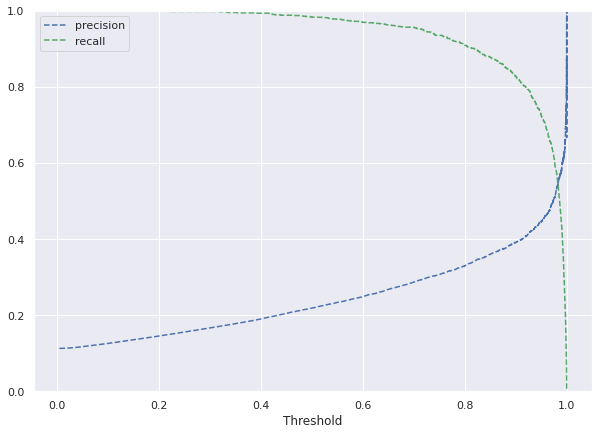

In [ ]:
# Plot values of precisions, recalls, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_test_pred_mod)

plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')

plt.ylim([0, 1])
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      8771
           1       0.29      0.96      0.44      1114

    accuracy                           0.73      9885
   macro avg       0.64      0.83      0.63      9885
weighted avg       0.91      0.73      0.78      9885



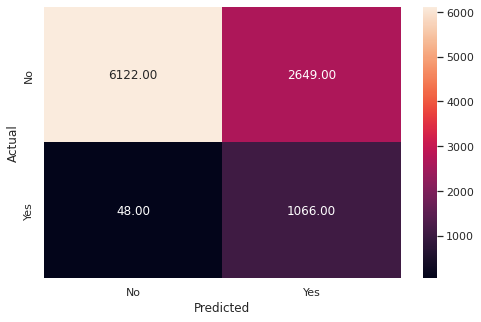

In [ ]:
#if we use 0.70 as the threshold

lr_mod_70 = LogisticRegression(class_weight= {0: .11, 1: .89},random_state =1)

lr_mod_70.fit(X_train_std,y_train)

THRESHOLD = 0.70

y_test_pred_mod_70 = np.where(lr_mod_70.predict_proba(X_test_std)[:,1]>THRESHOLD,1,0)

metrics_score(y_test, y_test_pred_mod_70)

### **Build a Decision Tree Model**

In [ ]:
#Defining Decision tree model with class weights class_weight={0: .11, 1: .89}

d_tree = DecisionTreeClassifier(random_state = 1, class_weight = {0: .11, 1: .89})

In [ ]:
#fitting Decision tree model

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2598
           1       1.00      1.00      1.00      2598

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196



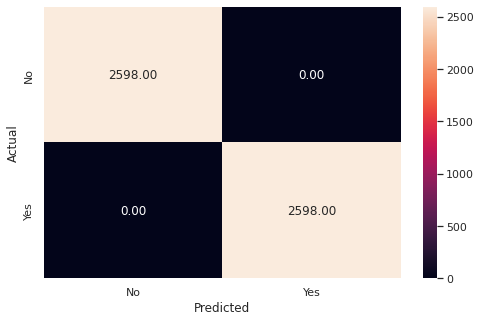

In [ ]:
# Checking performance on the training data

y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8771
           1       0.32      0.77      0.45      1114

    accuracy                           0.79      9885
   macro avg       0.64      0.78      0.66      9885
weighted avg       0.89      0.79      0.82      9885



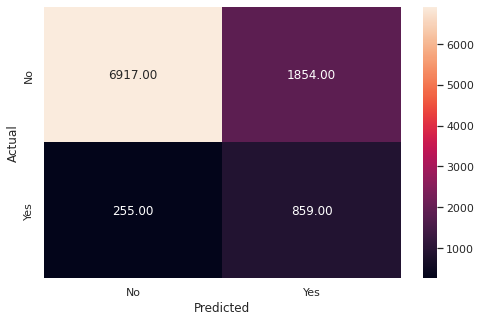

In [ ]:
# Checking performance on the testing data

y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Insight**  

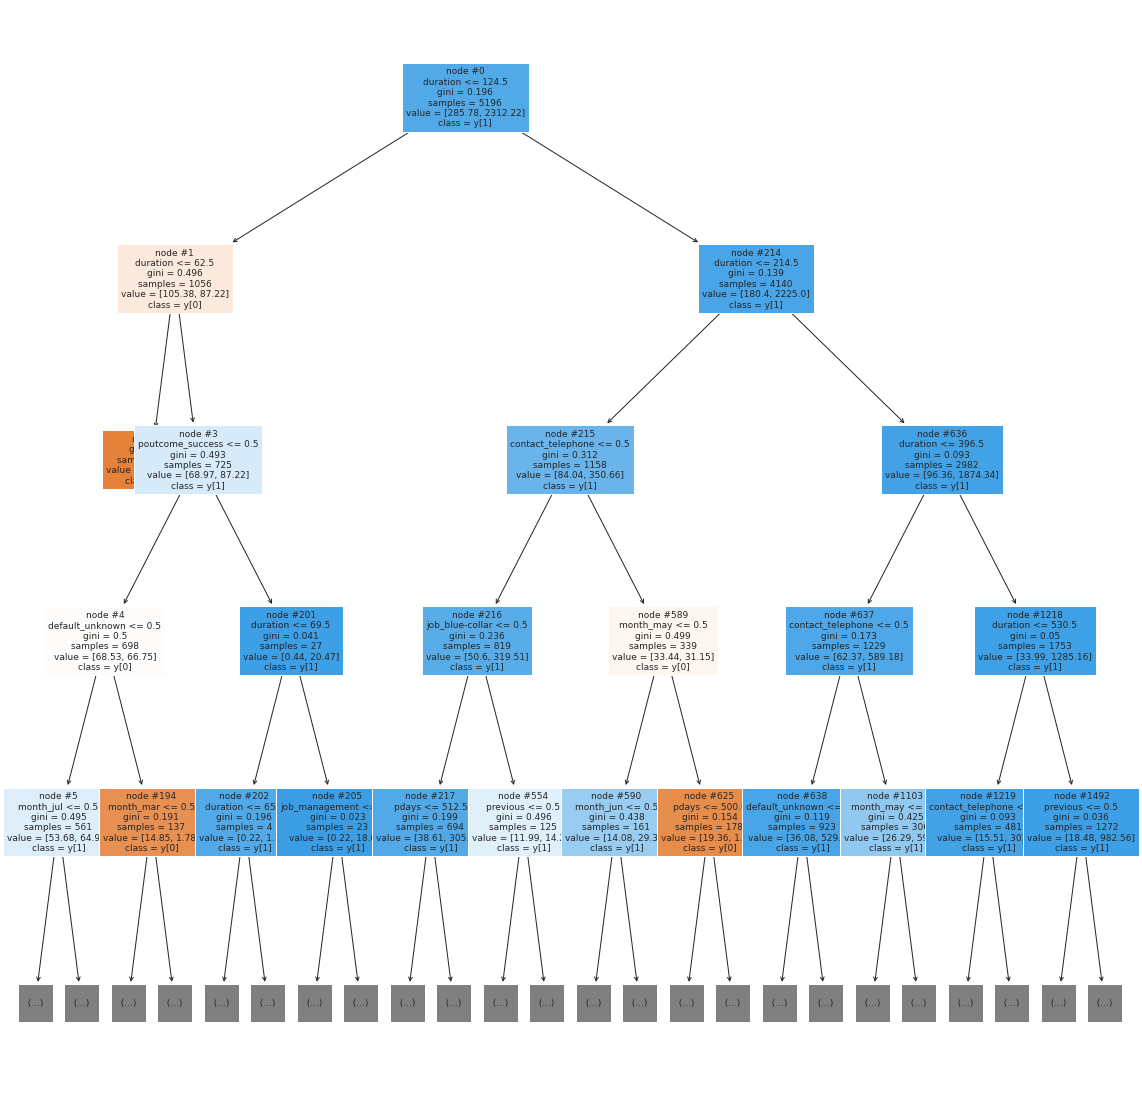

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 4)

plt.show()

**Insights**  

### **Decision Tree - Hyperparameter Tuning**

#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: .11, 1: .89})


# Grid of parameters to choose from

parameters = {'max_depth': np.arange(3, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)
                                                           

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      2598
           1       0.68      0.98      0.81      2598

    accuracy                           0.76      5196
   macro avg       0.82      0.76      0.75      5196
weighted avg       0.82      0.76      0.75      5196



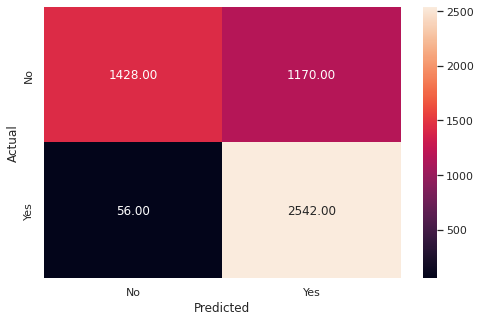

In [ ]:
# Checking performance on the training data based on the tuned model

y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.99      0.54      0.70      8771
           1       0.21      0.98      0.35      1114

    accuracy                           0.59      9885
   macro avg       0.60      0.76      0.52      9885
weighted avg       0.91      0.59      0.66      9885



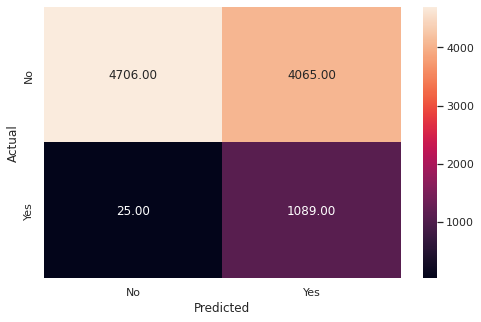

In [ ]:
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Insights** 

#### Plotting the Decision Tree

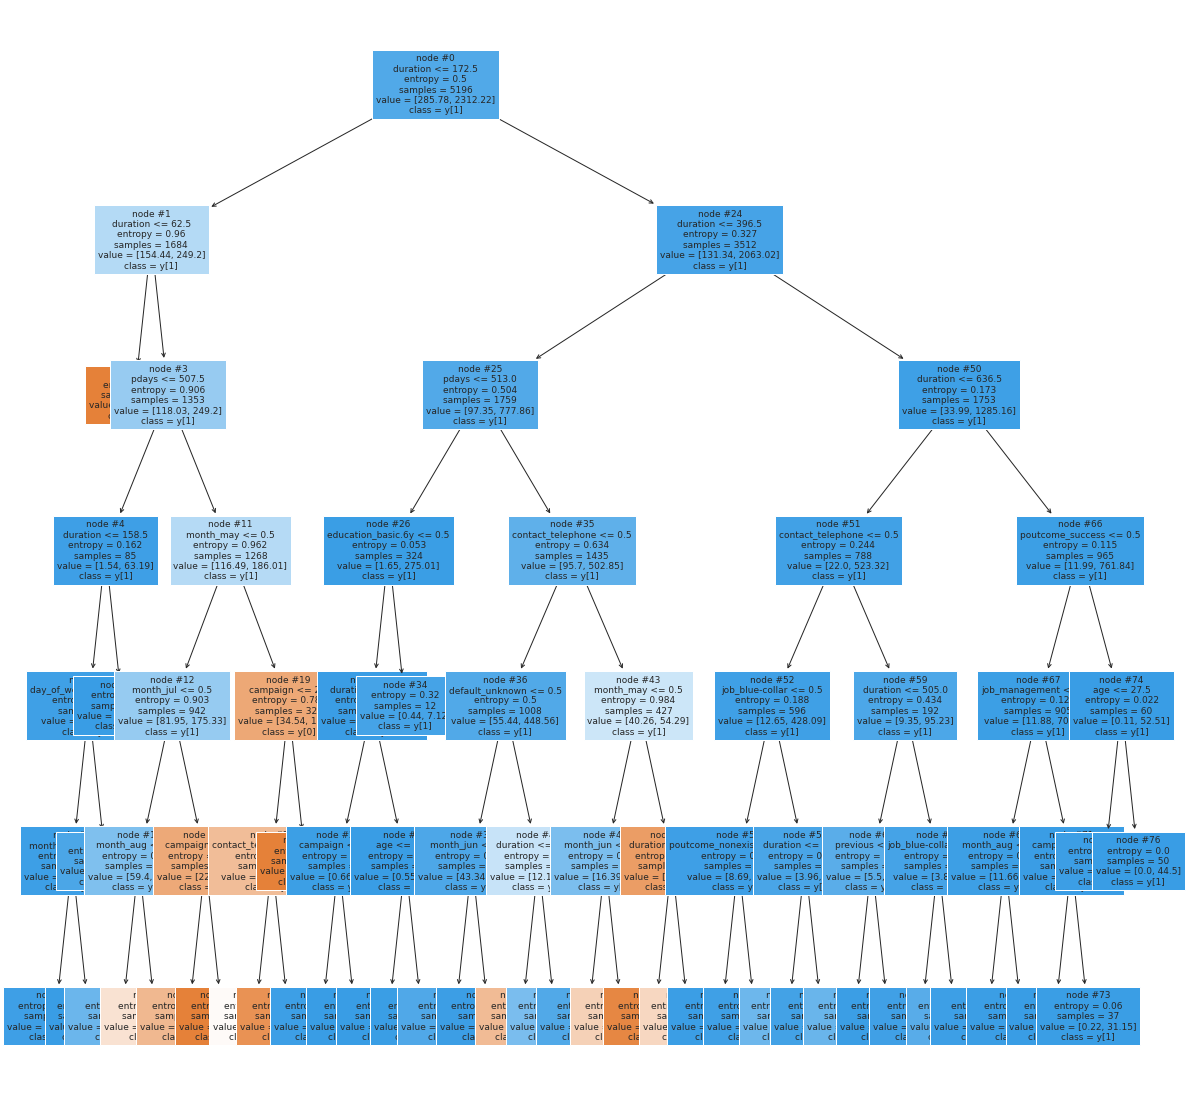

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
duration                       0.557547
pdays                          0.137853
contact_telephone              0.076427
month_may                      0.075724
month_jul                      0.035642
month_jun                      0.029836
default_unknown                0.025168
month_aug                      0.024829
campaign                       0.016004
job_blue-collar                0.006969
previous                       0.003894
poutcome_nonexistent           0.003009
education_basic.6y             0.001712
age                            0.001710
poutcome_success               0.001305
job_management                 0.000942
day_of_week_mon                0.000923
month_nov                      0.000506
job_unknown                    0.000000
job_services                   0.000000
job_entrepreneur               0.000000
day_of_week_wed                0.000000
day_of_week_tue                0.000000
day_of_week_thu                0.000000


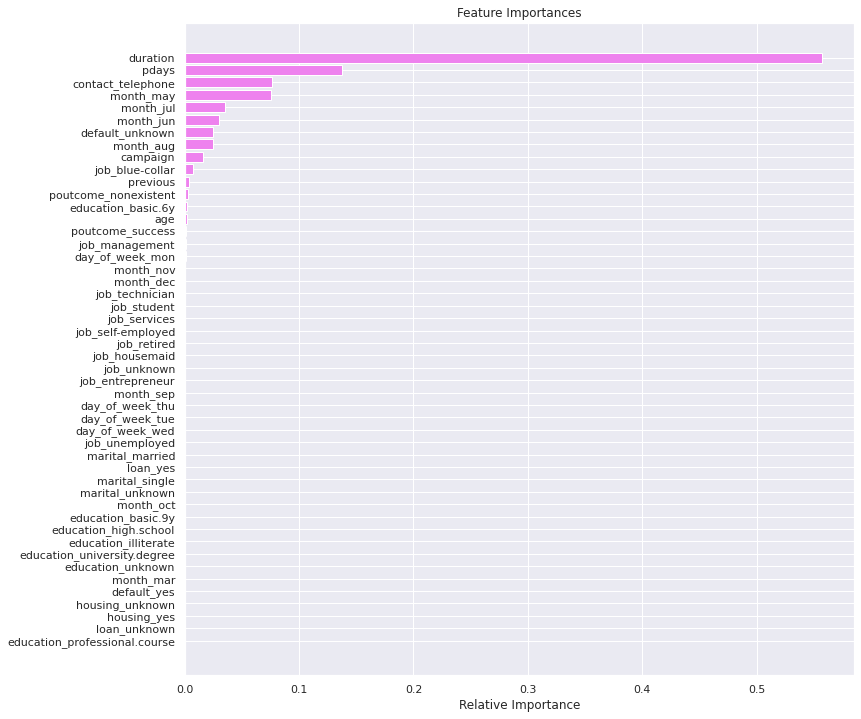

In [ ]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Building a Random Forest Classifier**

In [ ]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2598
           1       1.00      1.00      1.00      2598

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196



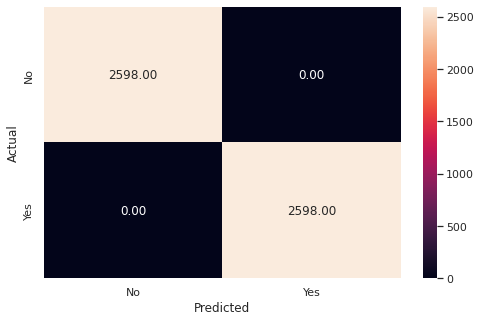

In [ ]:
#Checking performance on the training data

y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8771
           1       0.39      0.89      0.54      1114

    accuracy                           0.83      9885
   macro avg       0.69      0.86      0.72      9885
weighted avg       0.92      0.83      0.86      9885



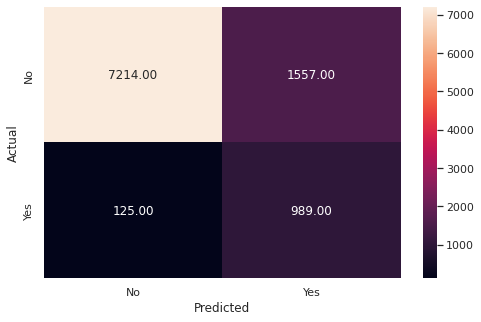

In [ ]:
# Checking performance on the test data

y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test3)

**Observations:**  

### **Build a Random Forest model with Class Weights**

In [ ]:
# Defining Random Forest model with class weights class_weight={0: .11, 1: .89}

rf_estimator_cw= RandomForestClassifier(random_state=1, class_weight={0: .11, 1: .89})

# Fitting Random Forest model

rf_estimator_cw.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

#### Checking the performance on the train dataset


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2598
           1       1.00      1.00      1.00      2598

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196



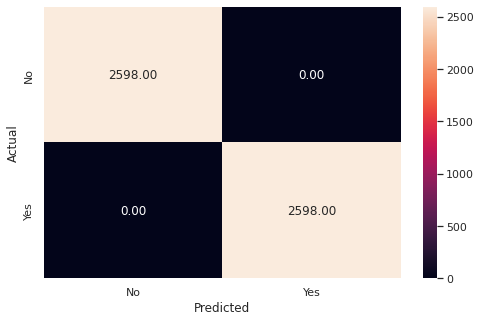

In [ ]:
# Checking performance on the train data

y_pred_train4 = rf_estimator_cw.predict(X_train)

metrics_score(y_train,y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8771
           1       0.38      0.88      0.53      1114

    accuracy                           0.83      9885
   macro avg       0.68      0.85      0.71      9885
weighted avg       0.91      0.83      0.85      9885



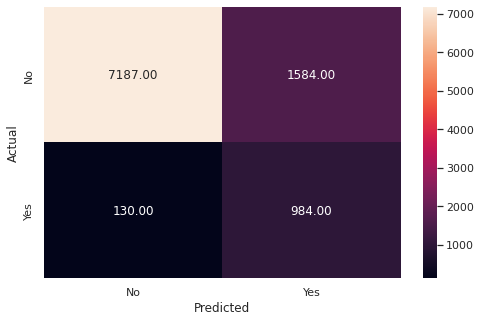

In [ ]:
# Checking performance on the test data

y_pred_test4 = rf_estimator_cw.predict(X_test)

metrics_score(y_test,y_pred_test4)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8771
           1       0.40      0.88      0.55      1114

    accuracy                           0.83      9885
   macro avg       0.69      0.85      0.72      9885
weighted avg       0.92      0.83      0.86      9885



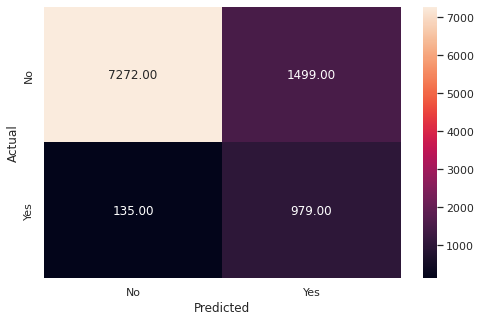

In [ ]:
# applying different weight to the class and testing the performance

rf_estimator_cw1= RandomForestClassifier(random_state=1, class_weight={0: .89, 1: .11})

rf_estimator_cw1.fit(X_train,y_train)

y_pred_train5 = rf_estimator_cw1.predict(X_train)

y_pred_test5 = rf_estimator_cw1.predict(X_test)

metrics_score(y_test,y_pred_test5)

### **Tuning the Random Forest**

In [ ]:
# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(random_state = 42)


params = {'n_estimators' :[3,10,100,1000,10000], 'n_jobs':[-1]}



# Grid of parameters to choose from



             

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(RandomForestClassifier(),
params,
cv = 10,
scoring='roc_auc',
n_jobs = -1,
verbose = True
)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned_base = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned_base.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomForestClassifier(n_estimators=10000, n_jobs=-1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2598
           1       1.00      1.00      1.00      2598

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196



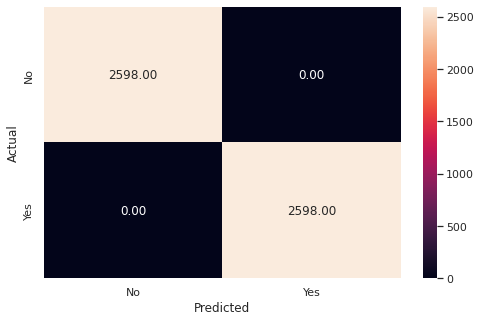

In [ ]:
# Checking performance on the training data

y_pred_train6 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train6)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8771
           1       0.39      0.89      0.54      1114

    accuracy                           0.83      9885
   macro avg       0.69      0.86      0.72      9885
weighted avg       0.92      0.83      0.86      9885



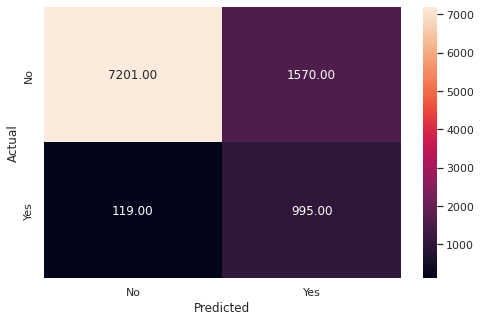

In [ ]:
# Checking performace on test dataset

y_pred_test6 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test6)

**Insights:**  

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

print (pd.DataFrame(rf_estimator_tuned_base.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
duration                       0.359116
age                            0.096971
campaign                       0.042975
pdays                          0.033594
contact_telephone              0.030792
poutcome_success               0.024618
previous                       0.024139
poutcome_nonexistent           0.021273
housing_yes                    0.019350
month_may                      0.019253
default_unknown                0.016749
month_oct                      0.015413
month_jul                      0.013928
day_of_week_thu                0.013822
month_mar                      0.013738
day_of_week_mon                0.013310
day_of_week_wed                0.013274
day_of_week_tue                0.013002
month_jun                      0.012943
job_blue-collar                0.012788
education_university.degree    0.012667
marital_married                0.012254
marital_single                 0.012137
month_aug                      0.012049


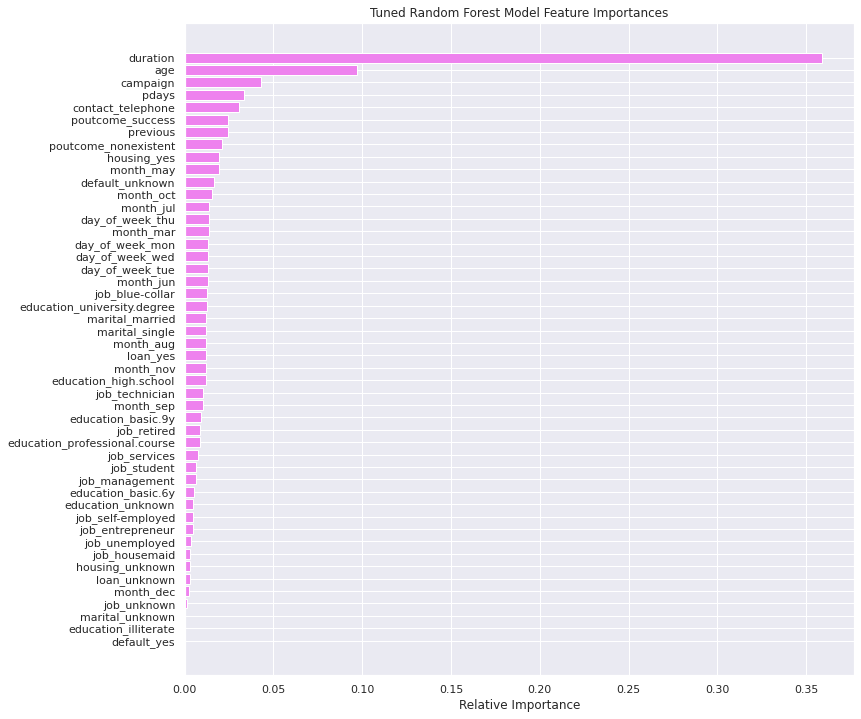

In [ ]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Tuned Random Forest Model Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8771
           1       0.39      0.88      0.54      1114

    accuracy                           0.83      9885
   macro avg       0.69      0.85      0.72      9885
weighted avg       0.92      0.83      0.86      9885



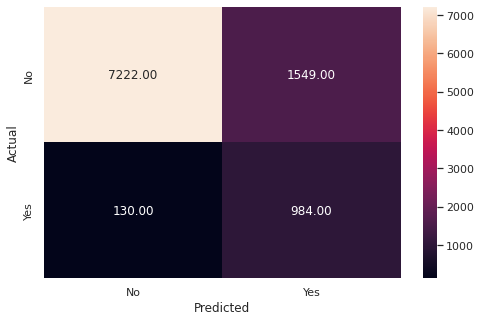

In [ ]:
# XGBoost Regressor
xgb_cl = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb_cl.fit(X_train,y_train)

# Model Performance on the train data

#y_pred_train8 = xgb_cl.predict(X_train)

#metrics_score(y_train, y_pred_train8)

# Model Performance on the test data

y_pred_test8 = xgb_cl.predict(X_test)

metrics_score(y_test, y_pred_test8)

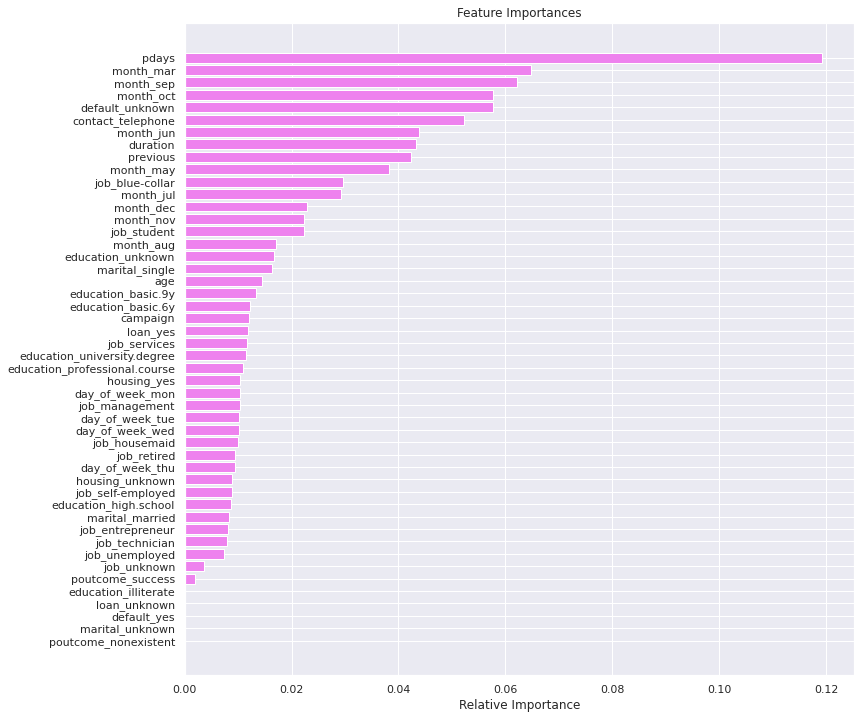

In [ ]:
importances = xgb_cl.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Grid of parameters to choose from

xgb_param = {"n_estimators": [10, 50, 100],
    "max_depth": [3, 10],
    "min_child_weight": [1,2],
    "learning_rate": [0.1,0.2,0.5],
    "scale_pos_weight": [0,1,5,10],
    "gamma":[0,1,3]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(xgb_cl, xgb_param, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

xgb_cl_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

xgb_cl_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8771
           1       0.40      0.89      0.55      1114

    accuracy                           0.83      9885
   macro avg       0.69      0.86      0.72      9885
weighted avg       0.92      0.83      0.86      9885



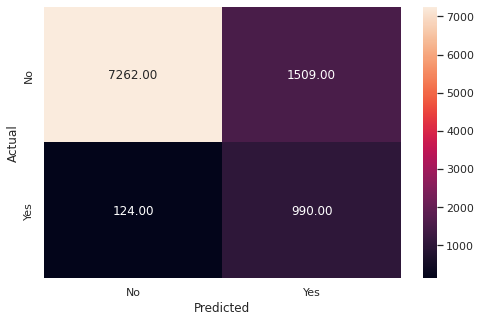

In [ ]:
# Model Performance on the test data

y_pred_test9 = xgb_cl_tuned.predict(X_test)

metrics_score(y_test, y_pred_test9)

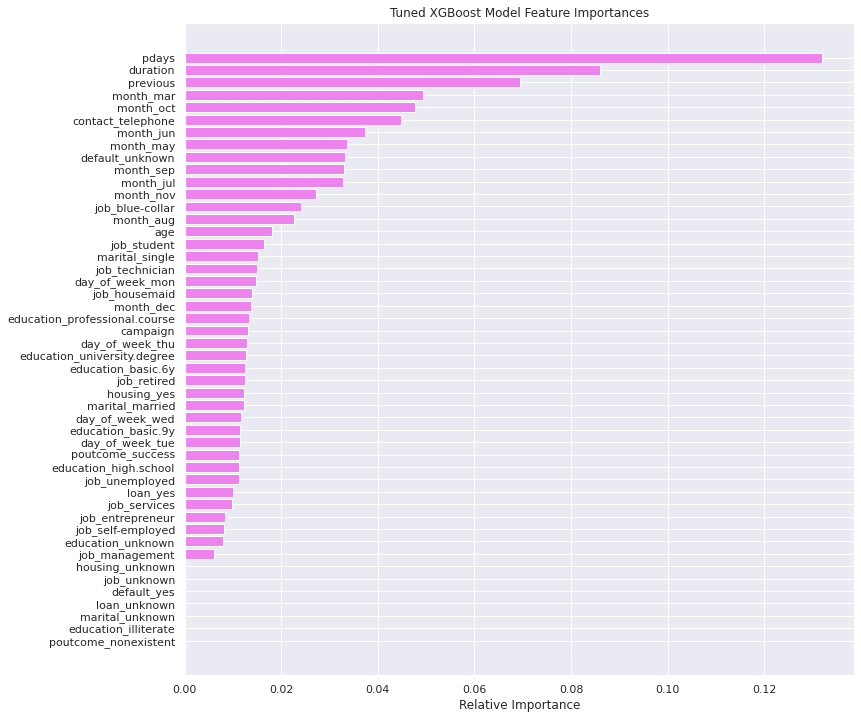

In [ ]:
importances = xgb_cl_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Tuned XGBoost Model Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [d_tree,d_tree_tuned,rf_estimator,rf_estimator_cw,rf_estimator_cw1,rf_estimator_tuned_base,xgb_cl,xgb_cl_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Decision_tree','Decision_tree_tuned','Random_forest','Random_forest_cw','Random_forest_cw_mod','Tandon_forest_tuned','XGB','XGBtuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision_tree,1.000000,0.786646,1.000000,0.771095,1.000000,0.316624
1,Decision_tree_tuned,0.764049,0.586242,0.978445,0.977558,0.684806,0.211292
2,Random_forest,1.000000,0.829843,1.000000,0.887792,1.000000,0.388452
3,Random_forest_cw,1.000000,0.826606,1.000000,0.883303,1.000000,0.383178
4,Random_forest_cw_mod,1.000000,0.834699,1.000000,0.878815,1.000000,0.395077
5,Tandon_forest_tuned,1.000000,0.829135,1.000000,0.893178,1.000000,0.387914
6,XGB,0.962664,0.830147,0.973441,0.883303,0.952901,0.388472
7,XGBtuned,0.904542,0.834800,0.930331,0.888689,0.884700,0.396158


In [ ]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.5 MB/s eta 0:00:00


In [ ]:
# Create SHAP explainer 
explainer = shap.TreeExplainer(xgb_cl_tuned)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

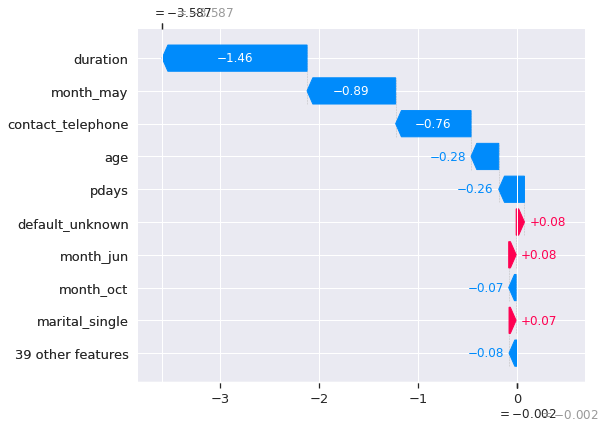

In [ ]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[300],feature_names=X_test.columns)

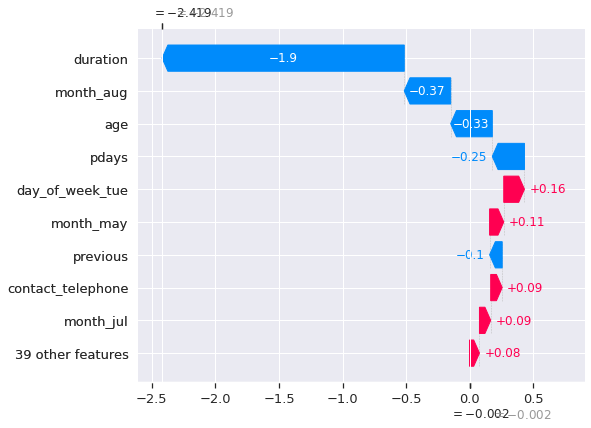

In [ ]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[341],feature_names=X_test.columns)

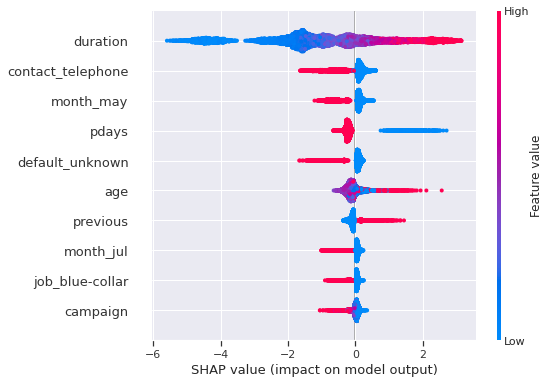

In [ ]:
#plot the summary plot to see the impact of each feature on the model output

shap.summary_plot(shap_values, X_test, max_display = 10)

In [ ]:
# Create SHAP explainer for tuned random forest model
explainer = shap.TreeExplainer(rf_estimator_tuned_base)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display = 10)